<center><h1>FINAL PROJECT</h1></center>

<center><h1> CLASSIFICATION READMITTED OF DATA DIABETES </h1></center>

# <center><h3>BY</h3></center>
<center><h3>Nova Lailatul Rizkiyah</h3></center>
<center><h3>Devi Noor Endrawati</h3></center>
<center><h3>Amirul Mu'minin</h3></center>

<center><h3></h3></center>
<center><h3></h3></center>

# DATA

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from statistics import mode
import statsmodels.api as sm
import matplotlib.pyplot as plt 


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split #model untuk membagi dataset
from sklearn.metrics import classification_report #untuk mempermudah cek evaluasi
from sklearn.datasets import load_iris #dataset yang tersedia
from sklearn.metrics import accuracy_score


import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("C:/Users/LENOVO/diabetic_data.csv")

In [3]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
data.shape

(101766, 50)

In [5]:
data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [7]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# PREPROCESSING

In [8]:
data.shape

(101766, 50)

In [9]:
data = data.drop(['encounter_id','patient_nbr','gender','weight','payer_code','medical_specialty','chlorpropamide','acetohexamide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','nateglinide','glimepiride','admission_type_id'], axis=1)

In [10]:
data.shape

(101766, 24)

In [11]:
data.dtypes

race                        object
age                         object
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
glipizide                   object
insulin                     object
change                      object
diabetesMed                 object
readmitted                  object
dtype: object

In [12]:
data.head()

,race,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,glipizide,insulin,change,diabetesMed,readmitted
0,Caucasian,[0-10),25,1,1,41,0,1,0,0,...,1,None,None,No,No,No,No,No,No,NO
1,Caucasian,[10-20),1,7,3,59,0,18,0,0,...,9,None,None,No,No,No,Up,Ch,Yes,>30
2,AfricanAmerican,[20-30),1,7,2,11,5,13,2,0,...,6,None,None,No,No,Steady,No,No,Yes,NO
3,Caucasian,[30-40),1,7,2,44,1,16,0,0,...,7,None,None,No,No,No,Up,Ch,Yes,NO
4,Caucasian,[40-50),1,7,1,51,0,8,0,0,...,5,None,None,No,No,Steady,Steady,Ch,Yes,NO


In [13]:
le = preprocessing.LabelEncoder()
le.fit(data['race'])
data['race'] = le.transform(data['race'])
data['race'] = data['race'].astype('int64')
data.head()

,race,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,glipizide,insulin,change,diabetesMed,readmitted
0,3,[0-10),25,1,1,41,0,1,0,0,...,1,None,None,No,No,No,No,No,No,NO
1,3,[10-20),1,7,3,59,0,18,0,0,...,9,None,None,No,No,No,Up,Ch,Yes,>30
2,1,[20-30),1,7,2,11,5,13,2,0,...,6,None,None,No,No,Steady,No,No,Yes,NO
3,3,[30-40),1,7,2,44,1,16,0,0,...,7,None,None,No,No,No,Up,Ch,Yes,NO
4,3,[40-50),1,7,1,51,0,8,0,0,...,5,None,None,No,No,Steady,Steady,Ch,Yes,NO


In [14]:
age_dict = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}
data['age'] = data.age.map(age_dict)
data['age'] = data['age'].astype('int64')
data.head()

,race,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,glipizide,insulin,change,diabetesMed,readmitted
0,3,5,25,1,1,41,0,1,0,0,...,1,None,None,No,No,No,No,No,No,NO
1,3,15,1,7,3,59,0,18,0,0,...,9,None,None,No,No,No,Up,Ch,Yes,>30
2,1,25,1,7,2,11,5,13,2,0,...,6,None,None,No,No,Steady,No,No,Yes,NO
3,3,35,1,7,2,44,1,16,0,0,...,7,None,None,No,No,No,Up,Ch,Yes,NO
4,3,45,1,7,1,51,0,8,0,0,...,5,None,None,No,No,Steady,Steady,Ch,Yes,NO


In [15]:
data.shape

(101766, 24)

In [16]:
data = data.drop(data[(data.diag_3 == '?') |(data.diag_2 == '?') | (data.diag_1 == '?')].index)

In [17]:
data.shape

(100244, 24)

In [18]:
data['diag_3'] = data['diag_3'].map(lambda x: x.lstrip('E').rstrip('E'))
data['diag_2'] = data['diag_2'].map(lambda x: x.lstrip('E').rstrip('E'))
data['diag_1'] = data['diag_1'].map(lambda x: x.lstrip('E').rstrip('E'))
data['diag_3'] = data['diag_3'].map(lambda x: x.lstrip('V').rstrip('V'))
data['diag_2'] = data['diag_2'].map(lambda x: x.lstrip('V').rstrip('V'))
data['diag_1'] = data['diag_1'].map(lambda x: x.lstrip('V').rstrip('V'))

In [19]:
data['diag_1'] = data['diag_1'].astype('float64')
data['diag_2'] = data['diag_2'].astype('float64')
data['diag_3'] = data['diag_3'].astype('float64')

In [20]:
data.shape

(100244, 24)

In [21]:
data = data.drop(data[(data.diag_3 < 100) &(data.diag_2 < 100) & (data.diag_1 < 100)].index)

In [22]:
data.shape

(100192, 24)

In [23]:
data = data.drop(data[(data.diag_3 < 100) |(data.diag_2 < 100) | (data.diag_1 < 100)].index)

In [24]:
data.shape

(88289, 24)

In [25]:
data.dtypes

race                          int64
age                           int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
glipizide                    object
insulin                      object
change                       object
diabetesMed                  object
readmitted                   object
dtype: object

In [26]:
data['A1Cresult'] = data['A1Cresult'].replace('>7', 1)
data['A1Cresult'] = data['A1Cresult'].replace('>8', 1)
data['A1Cresult'] = data['A1Cresult'].replace('Norm', 0)
data['A1Cresult'] = data['A1Cresult'].replace('None', -99)

In [27]:
data.A1Cresult.value_counts()

-99    73356
 1     10547
 0      4386
Name: A1Cresult, dtype: int64

In [28]:
data['max_glu_serum'] = data['max_glu_serum'].replace('>200', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('>300', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('Norm', 0)
data['max_glu_serum'] = data['max_glu_serum'].replace('None', -99)

In [29]:
data.max_glu_serum.value_counts()

-99    83574
 1      2416
 0      2299
Name: max_glu_serum, dtype: int64

In [30]:
for col in data:
    data[col] = data[col].replace('No', 0)
    data[col] = data[col].replace('Steady', 1)
    data[col] = data[col].replace('Up', 1)
    data[col] = data[col].replace('Down', 1)

In [31]:
data.head().T

,1,4,5,7,9
race,3,3,3,3,3
age,15,45,55,75,95
discharge_disposition_id,1,1,1,1,3
admission_source_id,7,7,2,7,4
time_in_hospital,3,1,3,5,12
num_lab_procedures,59,51,31,73,33
num_procedures,0,0,6,0,3
num_medications,18,8,16,12,18
number_outpatient,0,0,0,0,0
number_emergency,0,0,0,0,0


In [32]:
data['change'] = data['change'].replace('Ch', 1)
data['change'] = data['change'].replace('No', 0)

In [33]:
data['diabetesMed'] = data['diabetesMed'].replace('Yes', 1)
data['diabetesMed'] = data['diabetesMed'].replace('No', 0)

In [34]:
data.head().T

,1,4,5,7,9
race,3,3,3,3,3
age,15,45,55,75,95
discharge_disposition_id,1,1,1,1,3
admission_source_id,7,7,2,7,4
time_in_hospital,3,1,3,5,12
num_lab_procedures,59,51,31,73,33
num_procedures,0,0,6,0,3
num_medications,18,8,16,12,18
number_outpatient,0,0,0,0,0
number_emergency,0,0,0,0,0


In [35]:
data['readmitted'] = data['readmitted'].replace('>30', 0)
data['readmitted'] = data['readmitted'].replace('<30', 1) 
data['readmitted'] = data['readmitted'].replace('NO', 0)

In [36]:
data.head().T

,1,4,5,7,9
race,3.00,3.0,3.0,3.0,3.0
age,15.00,45.0,55.0,75.0,95.0
discharge_disposition_id,1.00,1.0,1.0,1.0,3.0
admission_source_id,7.00,7.0,2.0,7.0,4.0
time_in_hospital,3.00,1.0,3.0,5.0,12.0
num_lab_procedures,59.00,51.0,31.0,73.0,33.0
num_procedures,0.00,0.0,6.0,0.0,3.0
num_medications,18.00,8.0,16.0,12.0,18.0
number_outpatient,0.00,0.0,0.0,0.0,0.0
number_emergency,0.00,0.0,0.0,0.0,0.0


0    78416
1     9873
Name: readmitted, dtype: int64


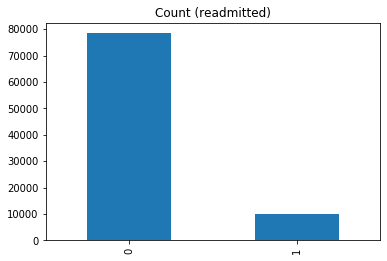

In [37]:
print(data.readmitted.value_counts())
data.readmitted.value_counts().plot(kind='bar', title='Count (readmitted)');

In [38]:
data.shape

(88289, 24)

# MACHINE LEARNING CLASSIFICATION

In [39]:
# define the dictionary of models our script can use
# the key to the dictionary is the name of the model
# (supplied via command line argument) and the value is the model itself
models = {
    "knn": KNeighborsClassifier(n_neighbors=5),
    "naive_bayes": GaussianNB(),
    "logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
    "svm": SVC(kernel="rbf", gamma="auto"),
    "decision_tree": DecisionTreeClassifier(),
    "random_forest": RandomForestClassifier(n_estimators=100),
}

In [40]:
data.dtypes

race                          int64
age                           int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
glipizide                     int64
insulin                       int64
change                        int64
diabetesMed                   int64
readmitted                    int64
dtype: object

In [41]:
Y = data['readmitted']

In [42]:
data2 = data

In [43]:
data2 = data2.drop(['readmitted'], axis=1)

In [44]:
data2.head().T

,1,4,5,7,9
race,3.00,3.0,3.0,3.0,3.0
age,15.00,45.0,55.0,75.0,95.0
discharge_disposition_id,1.00,1.0,1.0,1.0,3.0
admission_source_id,7.00,7.0,2.0,7.0,4.0
time_in_hospital,3.00,1.0,3.0,5.0,12.0
num_lab_procedures,59.00,51.0,31.0,73.0,33.0
num_procedures,0.00,0.0,6.0,0.0,3.0
num_medications,18.00,8.0,16.0,12.0,18.0
number_outpatient,0.00,0.0,0.0,0.0,0.0
number_emergency,0.00,0.0,0.0,0.0,0.0


==========================================PCA===============================================================

In [45]:
# from sklearn.preprocessing import StandardScaler
# # features = ['race','age','discharge_disposition_id','admission_source_id','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','diag_1','diag_2','diag_3','number_diagnoses','max_glu_serum','A1Cresult','metformin','repaglinide','glipizide','insulin','change','diabetesMed']
# # Separating out the features
# x = data.iloc[:,0:23].values
# y = data.iloc[Y].values
# # x = data3.loc[:, features].values
# # Separating out the target
# # y = data3.loc[:,['readmitted'].values
# # Standardizing the features
# x = StandardScaler().fit_transform(x)
# # sc_X = StandardScaler()
# # x = sc_X.fit_transform(x)


In [46]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [47]:
# data3 = principalDf
# data3.head()

In [48]:
# print("[INFO] loaading data...")
# (trainX, testX, trainY, testY) = train_test_split(principalDf, Y, random_state=3, test_size=0.25) 

In [49]:
# ##EXERCISE 1 Build classifier from 2-dimensional dataset resulted by PCA

# model = models["knn"]
# model.fit(trainX, trainY) #fit untuk melakukan proses training
# # make predictions on our data and show a classification report
# print("[INFO] evaluating...")
# predictions = model.predict(testX)
# print(classification_report(testY, predictions)) #classification_report untuk melakukan hasilnya

# print("KNN accuracy : ",accuracy_score(testY, predictions , normalize = True))


===================================================PCA================================================================

In [50]:
data2.head()

,race,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,glipizide,insulin,change,diabetesMed
1,3,15,1,7,3,59,0,18,0,0,...,255.0,9,-99,-99,0,0,0,1,1,1
4,3,45,1,7,1,51,0,8,0,0,...,250.0,5,-99,-99,0,0,1,1,1,1
5,3,55,1,2,3,31,6,16,0,0,...,250.0,9,-99,-99,0,0,0,1,0,1
7,3,75,1,7,5,73,0,12,0,0,...,250.0,8,-99,-99,0,0,0,0,0,1
9,3,95,3,4,12,33,3,18,0,0,...,486.0,8,-99,-99,0,0,0,1,1,1


In [51]:
# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE

from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(data2, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))

Using TensorFlow backend.


Original dataset shape Counter({0: 78416, 1: 9873})
New dataset shape Counter({0: 78416, 1: 78416})


In [52]:
train_input_new = pd.DataFrame(train_input_new, columns = list(data2.columns))

## Model Before Cross Validation

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(train_input_new,train_output_new, test_size =1/3, random_state=123)

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [55]:
# train the modelprint("[INFO] using '{}' model".format(model_name))
model = models["knn"]
model.fit(X_train, Y_train) #fit untuk melakukan proses training
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions)) #classification_report untuk melakukan hasilnya

print("KNN accuracy : ",accuracy_score(Y_test, predictions , normalize = True))
acc_knn = accuracy_score(Y_test, predictions , normalize = True)
precision_knn = precision_score(Y_test, predictions)
recall_knn = recall_score(Y_test,  predictions)
auc_knn = roc_auc_score(Y_test,  predictions)

[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.94      0.61      0.74     26274
           1       0.71      0.96      0.82     26004

    accuracy                           0.79     52278
   macro avg       0.83      0.79      0.78     52278
weighted avg       0.83      0.79      0.78     52278

KNN accuracy :  0.7854355560656491


In [56]:
# train the modelprint("[INFO] using '{}' model".format(model_name))
model = models["naive_bayes"]
model.fit(X_train, Y_train) #fit untuk melakukan proses training
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions)) #classification_report untuk melakukan hasilnya

print("naive_bayes accuracy : ",accuracy_score(Y_test, predictions , normalize = True))
acc_nb = accuracy_score(Y_test, predictions , normalize = True)
precision_nb = precision_score(Y_test, predictions)
recall_nb = recall_score(Y_test,  predictions)
auc_nb = roc_auc_score(Y_test,  predictions)

[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.65      0.70      0.68     26274
           1       0.67      0.62      0.65     26004

    accuracy                           0.66     52278
   macro avg       0.66      0.66      0.66     52278
weighted avg       0.66      0.66      0.66     52278

naive_bayes accuracy :  0.6616358697731359


In [57]:
# train the modelprint("[INFO] using '{}' model".format(model_name))
model = models["decision_tree"]
model.fit(X_train, Y_train) #fit untuk melakukan proses training
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions)) #classification_report untuk melakukan hasilnya

print("decision_tree accuracy : ",accuracy_score(Y_test, predictions , normalize = True))
acc_dt = accuracy_score(Y_test, predictions , normalize = True)
precision_dt = precision_score(Y_test, predictions)
recall_dt = recall_score(Y_test,  predictions)
auc_dt = roc_auc_score(Y_test,  predictions)

[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     26274
           1       0.87      0.89      0.88     26004

    accuracy                           0.88     52278
   macro avg       0.88      0.88      0.88     52278
weighted avg       0.88      0.88      0.88     52278

decision_tree accuracy :  0.8769845824247293


In [58]:
# train the modelprint("[INFO] using '{}' model".format(model_name))
model = models["random_forest"]
model.fit(X_train, Y_train) #fit untuk melakukan proses training
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions)) #classification_report untuk melakukan hasilnya

print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))
acc_rf = accuracy_score(Y_test, predictions , normalize = True)
precision_rf = precision_score(Y_test, predictions)
recall_rf = recall_score(Y_test,  predictions)
auc_rf = roc_auc_score(Y_test,  predictions)

[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26274
           1       1.00      0.87      0.93     26004

    accuracy                           0.94     52278
   macro avg       0.94      0.93      0.93     52278
weighted avg       0.94      0.94      0.93     52278

random_forest accuracy :  0.9351734955430583


In [59]:
# train the modelprint("[INFO] using '{}' model".format(model_name))
model = models["logit"]
model.fit(X_train, Y_train) #fit untuk melakukan proses training
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions)) #classification_report untuk melakukan hasilnya

print("logit accuracy : ",accuracy_score(Y_test, predictions , normalize = True))
acc_logit = accuracy_score(Y_test, predictions , normalize = True)
precision_logit = precision_score(Y_test, predictions)
recall_logit = recall_score(Y_test,  predictions)
auc_logit = roc_auc_score(Y_test,  predictions)

[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.60      0.64      0.62     26274
           1       0.61      0.56      0.58     26004

    accuracy                           0.60     52278
   macro avg       0.60      0.60      0.60     52278
weighted avg       0.60      0.60      0.60     52278

logit accuracy :  0.6027965874746547


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Model With Cross Validation

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

                                            TRY

In [61]:
logreg = LogisticRegression(fit_intercept=True, penalty='l1')
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=10))))
logreg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg.score(X_dev, Y_dev)))

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Cross Validation Score: 61.30%


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Dev Set score: 60.91%


In [62]:
knn2 =  KNeighborsClassifier()
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(knn2, X_train, Y_train, cv=10))))
knn2.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(knn2.score(X_dev, Y_dev)))

Cross Validation Score: 79.37%
Dev Set score: 80.25%


In [63]:
nb = GaussianNB()
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(nb, X_train, Y_train, cv=10))))
nb.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(nb.score(X_dev, Y_dev)))

Cross Validation Score: 66.11%
Dev Set score: 65.82%


In [64]:
dt = DecisionTreeClassifier()
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(dt, X_train, Y_train, cv=10))))
dt.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dt.score(X_dev, Y_dev)))

Cross Validation Score: 87.82%
Dev Set score: 88.19%


In [65]:
rf = RandomForestClassifier(n_estimators=100)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(dt, X_train, Y_train, cv=10))))
dt.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dt.score(X_dev, Y_dev)))

Cross Validation Score: 87.77%
Dev Set score: 88.21%


In [66]:
# train the modelprint("[INFO] using '{}' model".format(model_name))
model = models["knn"]
model.fit(X_train, Y_train) #fit untuk melakukan proses training
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions)) #classification_report untuk melakukan hasilnya

print("KNN accuracy : ",accuracy_score(Y_test, predictions , normalize = True))
acc_knn = accuracy_score(Y_test, predictions , normalize = True)
precision_knn = precision_score(Y_test, predictions)
recall_knn = recall_score(Y_test,  predictions)
auc_knn = roc_auc_score(Y_test,  predictions)

[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.98      0.72      0.83     26274
           1       0.77      0.99      0.87     26004

    accuracy                           0.85     52278
   macro avg       0.88      0.85      0.85     52278
weighted avg       0.88      0.85      0.85     52278

KNN accuracy :  0.8495543058265427


In [67]:
# train the modelprint("[INFO] using '{}' model".format(model_name))
model = models["naive_bayes"]
model.fit(X_train, Y_train) #fit untuk melakukan proses training
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions)) #classification_report untuk melakukan hasilnya

print("naive_bayes accuracy : ",accuracy_score(Y_test, predictions , normalize = True))
acc_nb = accuracy_score(Y_test, predictions , normalize = True)
precision_nb = precision_score(Y_test, predictions)
recall_nb = recall_score(Y_test,  predictions)
auc_nb = roc_auc_score(Y_test,  predictions)

[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.65      0.70      0.67     26274
           1       0.67      0.63      0.65     26004

    accuracy                           0.66     52278
   macro avg       0.66      0.66      0.66     52278
weighted avg       0.66      0.66      0.66     52278

naive_bayes accuracy :  0.6625157810168714


In [68]:
model = models["decision_tree"]
model.fit(X_train, Y_train) #fit untuk melakukan proses training
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions)) #classification_report untuk melakukan hasilnya

print("decision_tree accuracy : ",accuracy_score(Y_test, predictions , normalize = True))
acc_dt = accuracy_score(Y_test, predictions , normalize = True)
precision_dt = precision_score(Y_test, predictions)
recall_dt = recall_score(Y_test,  predictions)
auc_dt = roc_auc_score(Y_test,  predictions)

[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     26274
           1       0.97      0.98      0.98     26004

    accuracy                           0.98     52278
   macro avg       0.98      0.98      0.98     52278
weighted avg       0.98      0.98      0.98     52278

decision_tree accuracy :  0.976376295956234


In [69]:
# train the modelprint("[INFO] using '{}' model".format(model_name))
model = models["random_forest"]
model.fit(X_train, Y_train) #fit untuk melakukan proses training
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions)) #classification_report untuk melakukan hasilnya

print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))
acc_rf = accuracy_score(Y_test, predictions , normalize = True)
precision_rf = precision_score(Y_test, predictions)
recall_rf = recall_score(Y_test,  predictions)
auc_rf = roc_auc_score(Y_test,  predictions)

[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     26274
           1       1.00      0.97      0.99     26004

    accuracy                           0.99     52278
   macro avg       0.99      0.99      0.99     52278
weighted avg       0.99      0.99      0.99     52278

random_forest accuracy :  0.9870691304181491


In [70]:
# train the modelprint("[INFO] using '{}' model".format(model_name))
model = models["logit"]
model.fit(X_train, Y_train) #fit untuk melakukan proses training
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions)) #classification_report untuk melakukan hasilnya

print("logit accuracy : ",accuracy_score(Y_test, predictions , normalize = True))
acc_logit = accuracy_score(Y_test, predictions , normalize = True)
precision_logit = precision_score(Y_test, predictions)
recall_logit = recall_score(Y_test,  predictions)
auc_logit = roc_auc_score(Y_test,  predictions)

[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.59      0.65      0.62     26274
           1       0.61      0.55      0.58     26004

    accuracy                           0.60     52278
   macro avg       0.60      0.60      0.60     52278
weighted avg       0.60      0.60      0.60     52278

logit accuracy :  0.6008646084394965


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In

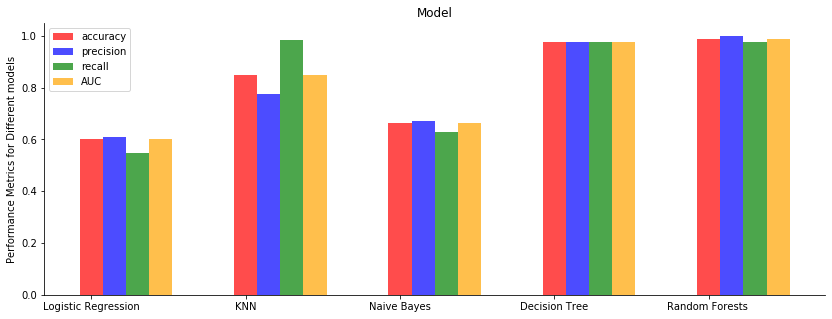

In [71]:
# plotting the accuracy for training and test
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['Logistic Regression', 'KNN','Naive Bayes', 'Decision Tree',  'Random Forests ' ]
values = [acc_logit, acc_knn , acc_nb, acc_dt, acc_rf]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)



ax = plt.subplot(111)
models = ['Logistic Regression', 'KNN','Naive Bayes', 'Decision Tree',  'Random Forests ' ]
values = [precision_logit, precision_knn , precision_nb, precision_dt, precision_rf]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)
models = ['Logistic Regression', 'KNN','Naive Bayes', 'Decision Tree',  'Random Forests ' ]
values = [recall_logit, recall_knn , recall_nb, recall_dt, recall_rf]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



ax = plt.subplot(111)
models = ['Logistic Regression', 'KNN','Naive Bayes', 'Decision Tree',  'Random Forests ' ]
values = [auc_logit, auc_knn , auc_nb, auc_dt, auc_rf]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'AUC')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

## Experiment Setting Model Parameter

### Criterion = Default


In [72]:
models = {"random_forest": RandomForestClassifier(n_estimators=10)} #n_estimators=10 default=10)The number of trees in the forest.
model = models["random_forest"]
model.fit(X_train, Y_train) 
print("[INFO] evaluating...")
predictions = model.predict(X_test)
#print(classification_report(Y_test, predictions))
print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))


[INFO] evaluating...
random_forest accuracy :  0.9786334595814683


In [73]:
models = {"random_forest": RandomForestClassifier(n_estimators=50)} #n_estimators=10 default=10)The number of trees in the forest.
model = models["random_forest"]
model.fit(X_train, Y_train) 
print("[INFO] evaluating...")
predictions = model.predict(X_test)
#print(classification_report(Y_test, predictions))
print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))


[INFO] evaluating...
random_forest accuracy :  0.9868013313439687


In [74]:
models = {"random_forest": RandomForestClassifier(n_estimators=75)} #n_estimators=10 default=10)The number of trees in the forest.
model = models["random_forest"]
model.fit(X_train, Y_train) 
print("[INFO] evaluating...")
predictions = model.predict(X_test)
#print(classification_report(Y_test, predictions))
print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))


[INFO] evaluating...
random_forest accuracy :  0.9870308734075519


In [75]:
models = {"random_forest": RandomForestClassifier(n_estimators=80)} #n_estimators=10 default=10)The number of trees in the forest.
model = models["random_forest"]
model.fit(X_train, Y_train) 
print("[INFO] evaluating...")
predictions = model.predict(X_test)
#print(classification_report(Y_test, predictions))
print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))


[INFO] evaluating...
random_forest accuracy :  0.9870882589234478


In [76]:
models = {"random_forest": RandomForestClassifier(n_estimators=90)} #n_estimators=10 default=10)The number of trees in the forest.
model = models["random_forest"]
model.fit(X_train, Y_train) 
print("[INFO] evaluating...")
predictions = model.predict(X_test)
#print(classification_report(Y_test, predictions))
print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))


[INFO] evaluating...
random_forest accuracy :  0.9867248173227744


In [77]:
models = {"random_forest": RandomForestClassifier(n_estimators=100)} #n_estimators=10 default=10)The number of trees in the forest.
model = models["random_forest"]
model.fit(X_train, Y_train) 
print("[INFO] evaluating...")
predictions = model.predict(X_test)
#print(classification_report(Y_test, predictions))
print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))


[INFO] evaluating...
random_forest accuracy :  0.9869734878916562


### Criterion = Gini

In [78]:
models = {"random_forest": RandomForestClassifier(n_estimators=10, criterion="gini")} #n_estimators=10 default=10)The number of trees in the forest.
model = models["random_forest"]
model.fit(X_train, Y_train) 
print("[INFO] evaluating...")
predictions = model.predict(X_test)
#print(classification_report(Y_test, predictions))
print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))


[INFO] evaluating...
random_forest accuracy :  0.9784421745284824


In [79]:
models = {"random_forest": RandomForestClassifier(n_estimators=50, criterion="gini")} #n_estimators=50 default=10)The number of trees in the forest.
model = models["random_forest"]
model.fit(X_train, Y_train) 
print("[INFO] evaluating...")
predictions = model.predict(X_test)
#print(classification_report(Y_test, predictions))
print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))


[INFO] evaluating...
random_forest accuracy :  0.986743945828073


In [80]:
models = {"random_forest": RandomForestClassifier(n_estimators=75, criterion="gini")} #n_estimators=10 default=10)The number of trees in the forest.
model = models["random_forest"]
model.fit(X_train, Y_train) 
print("[INFO] evaluating...")
predictions = model.predict(X_test)
#print(classification_report(Y_test, predictions))
print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))


[INFO] evaluating...
random_forest accuracy :  0.9870117449022533


In [81]:
models = {"random_forest": RandomForestClassifier(n_estimators=80, criterion="gini")} #n_estimators=80
model = models["random_forest"]
model.fit(X_train, Y_train) 
print("[INFO] evaluating...")
predictions = model.predict(X_test)
#print(classification_report(Y_test, predictions))
print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))


[INFO] evaluating...
random_forest accuracy :  0.9870500019128505


In [82]:
models = {"random_forest": RandomForestClassifier(n_estimators=90, criterion="gini")} #n_estimators=10 default=10)The number of trees in the forest.
model = models["random_forest"]
model.fit(X_train, Y_train) 
print("[INFO] evaluating...")
predictions = model.predict(X_test)
#print(classification_report(Y_test, predictions))
print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))


[INFO] evaluating...
random_forest accuracy :  0.9870500019128505


In [83]:
models = {"random_forest": RandomForestClassifier(n_estimators=100, criterion="gini")} #n_estimators=100 default=10)The number of trees in the forest.
model = models["random_forest"]
model.fit(X_train, Y_train) 
print("[INFO] evaluating...")
predictions = model.predict(X_test)
#print(classification_report(Y_test, predictions))
print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))


[INFO] evaluating...
random_forest accuracy :  0.9870308734075519


### Criterion = Entropy

In [84]:
models = {"random_forest": RandomForestClassifier(n_estimators=10, criterion="entropy")} #n_estimators=10 default=10)The number of trees in the forest.
model = models["random_forest"]
model.fit(X_train, Y_train) 
print("[INFO] evaluating...")
predictions = model.predict(X_test)
#print(classification_report(Y_test, predictions))
print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))


[INFO] evaluating...
random_forest accuracy :  0.9794751138146065


In [85]:
models = {"random_forest": RandomForestClassifier(n_estimators=50, criterion="entropy")} #n_estimators=10 default=10)The number of trees in the forest.
model = models["random_forest"]
model.fit(X_train, Y_train) 
print("[INFO] evaluating...")
predictions = model.predict(X_test)
#print(classification_report(Y_test, predictions))
print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))


[INFO] evaluating...
random_forest accuracy :  0.98664830330158


In [86]:
models = {"random_forest": RandomForestClassifier(n_estimators=75, criterion="entropy")} #n_estimators=10 default=10)The number of trees in the forest.
model = models["random_forest"]
model.fit(X_train, Y_train) 
print("[INFO] evaluating...")
predictions = model.predict(X_test)
#print(classification_report(Y_test, predictions))
print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))


[INFO] evaluating...
random_forest accuracy :  0.9868013313439687


In [87]:
models = {"random_forest": RandomForestClassifier(n_estimators=80, criterion="entropy")} #n_estimators=10 default=10)The number of trees in the forest.
model = models["random_forest"]
model.fit(X_train, Y_train) 
print("[INFO] evaluating...")
predictions = model.predict(X_test)
#print(classification_report(Y_test, predictions))
print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))


[INFO] evaluating...
random_forest accuracy :  0.9868778453651632


In [88]:
models = {"random_forest": RandomForestClassifier(n_estimators=90, criterion="entropy")} #n_estimators=10 default=10)The number of trees in the forest.
model = models["random_forest"]
model.fit(X_train, Y_train) 
print("[INFO] evaluating...")
predictions = model.predict(X_test)
#print(classification_report(Y_test, predictions))
print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))


[INFO] evaluating...
random_forest accuracy :  0.986935230881059


In [89]:
models = {"random_forest": RandomForestClassifier(n_estimators=100, criterion="entropy")} #n_estimators=10 default=10)The number of trees in the forest.
model = models["random_forest"]
model.fit(X_train, Y_train) 
print("[INFO] evaluating...")
predictions = model.predict(X_test)
#print(classification_report(Y_test, predictions))
print("random_forest accuracy : ",accuracy_score(Y_test, predictions , normalize = True))


[INFO] evaluating...
random_forest accuracy :  0.9869161023757603
